# Task 4.9 Part 2

## Content of Workbook:
## Step 2: Find in Exercise 4.9 notebook
## Step 3: Histogram of order hour of day
## Step 4: Loyalty flag bar chart
## Step 5: Prices (expenditure) by hour of day line chart
## Step 6: Age by number of dependents line chart
## Step 7: Age by spending power scatterplot

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import dataframe
path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\Data Immersion\Achievement 4\01-2025 Instacart Basket Analysis'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl')
df = pd.read_pickle(file_path)

### Step 2: Find in Exercise 4.9 notebook

### Step 3: Histogram of order hour of day

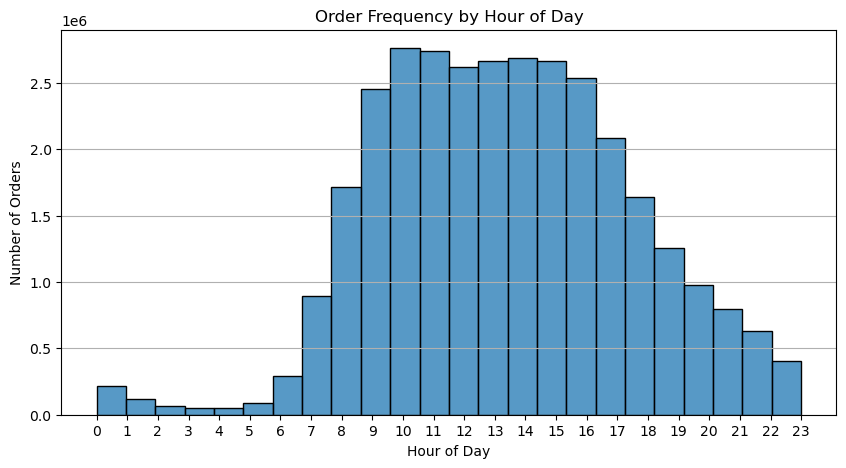

In [9]:
# Plot: Order Frequency by Hour of Day
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='order_hour_of_day', bins=24)
plt.title('Order Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


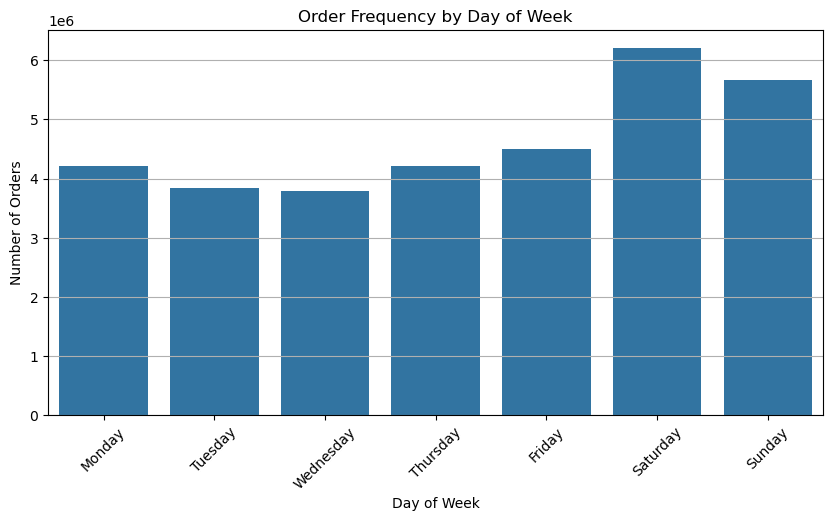

In [11]:

# Mapping day numbers to day names (0=Saturday, 1=Sunday, ..., 6=Friday)
day_map = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 
           4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Create a new column with day names
df['day_name'] = df['orders_day_of_week'].map(day_map)

# Define desired order: Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_name', order=day_order)
plt.title('Order Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


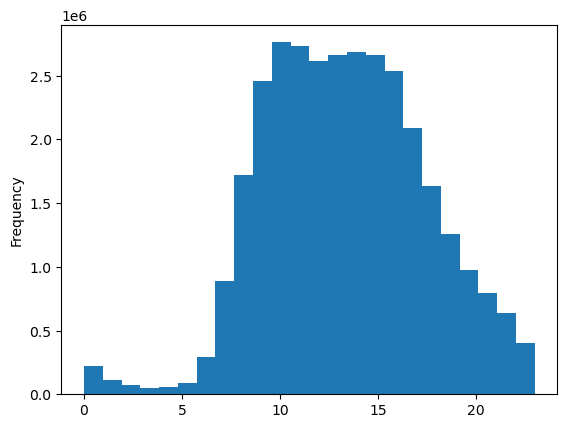

In [31]:
# Creating order_hour_of_day histogram
hist = df['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram demonstrates that the hours between 12 AM and 6 AM are the least busy in terms of orders, then orders start to pick up at 7 AM. Orders are at their busiest between the hours of 9am and 4pm and then slowly start to decline towards the end of the day.

In [33]:
# Export histogram as image file 
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_order_hour_of_day.png'))

### Step 4: Loyalty flag bar chart

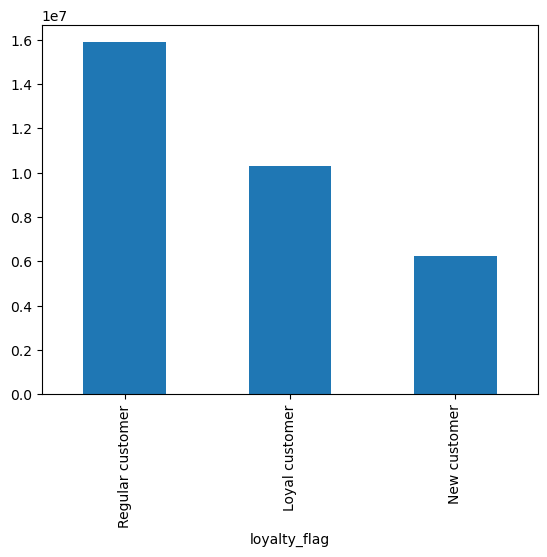

In [35]:
# Create loyalty flag bar chart
bar = df['loyalty_flag'].value_counts().plot.bar()

In [36]:
# Export bar chart as image file 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_customer_loyalty.png'))

### Step 5: Prices (expenditure) by hour of day line chart

#### Data Sampling

In [39]:
# Setting the seed and dev
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [40]:
# Check dev ouput
dev

array([False,  True, False, ...,  True,  True,  True])

In [41]:
# Store 70% of sameple in big df
big = df[dev]

In [42]:
# Store 30% of sameple in big df
small = df[~dev]

In [43]:
# Check total rows in df
len(df)

32404859

In [44]:
# Check samples add up to total rows
len(big) + len(small)

32404859

In [45]:
# Create new df with necessary columns for line chart
df_2 = small[['order_hour_of_day', 'prices']]

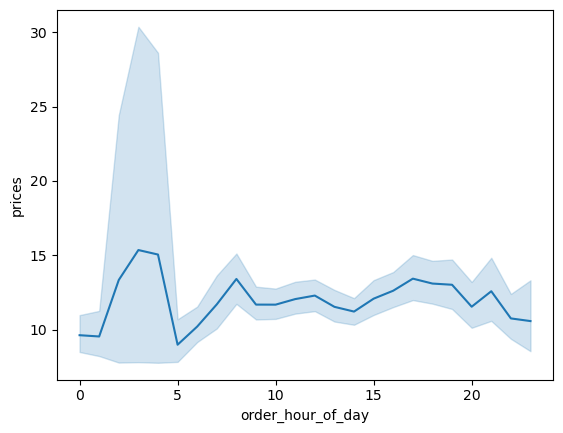

In [46]:
# Create Line Chart of prices by hour of day
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [47]:
# Export line chart as image file 
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_prices_by_hour.png'))

### Step 6: Age by number of dependents line chart

In [49]:
# Group by Age and Calculate the Average Number of Dependents
df_3 = small.groupby('age', as_index=False).agg({'num_dependents': 'mean'})

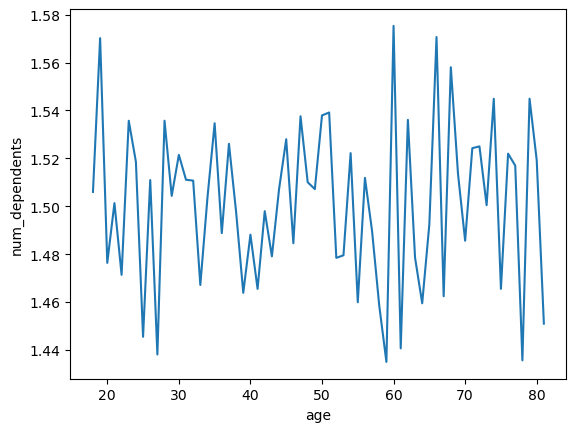

In [50]:
# Create line chatrt of age by average number of dependents
line_2 = sns.lineplot(data=df_3, x='age', y='num_dependents')

#### The line chart demonstrating age by average number of dependents is very high in variability. From the line chart we can discnern that there is no connection between age and number of dependents in our customer data.

In [52]:
# Export line chart as image file 
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_age_by_dependents.png'))

### Step 7: Age by spending power scatterplot

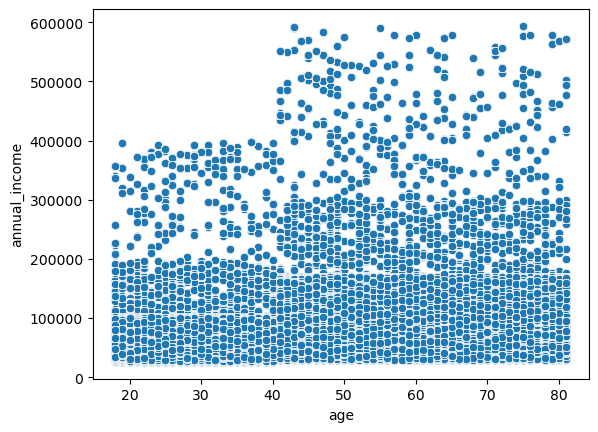

In [54]:
# Create age by annual income scatterplot
scatter = sns.scatterplot(x = 'age', y = 'annual_income', data = small)

In [55]:
# Export scatterplot as image file 
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatter_age_by_income.png'))

In [56]:
# Calculate pearson's correlation between age and annual income
correlation = small[['age', 'annual_income']].corr(method='pearson')
print("\nPearson Correlation:\n", correlation)


Pearson Correlation:
                     age  annual_income
age            1.000000       0.417266
annual_income  0.417266       1.000000


#### From viewing the scatterplot it is hard to determine a relationship between age and annual income due to the sheer number of plot points in the data. However, after caluclating the correlation coefficient we can determine that there is a moderate positive correlation between age and annual income.

In [84]:
# ✅ Display only user_id, order_id, and prices
df_active_filtered = df[['user_id', 'order_id', 'prices']]

# ✅ Show the first few rows to verify
print(df_active_filtered.head())


   user_id  order_id  prices
0    26711    518967     4.3
1    26711    423547    12.6
2    26711   2524893    12.6
3    26711   2524893     4.3
4    26711   2524893     7.1
